In [1]:
import cantera as ct
import numpy as np
import scipy
import pylab
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# import the file
gas = ct.Solution('propanepyrolysis.cti', 'gas')
print(f"This mechanism contains {gas.n_reactions} gas reactions")


This mechanism contains 668 gas reactions


In [3]:
gas.species_names

['He',
 'Ne',
 'propane(1)',
 'H(2)',
 'H2(6)',
 'CH3(14)',
 'CH4(15)',
 'C2H6(36)',
 'C2H5(37)',
 'C2H4(38)',
 'C2H3(41)',
 'C3H3(66)',
 'NC3H7(92)',
 'IC3H7(93)',
 'C3H5-A(94)',
 'C3H6(95)',
 'C3H5(101)',
 'C4H5(106)',
 'C4H5(107)',
 'C3H4(167)',
 'C3H4(169)',
 'PC4H9(183)',
 'SC4H9(184)',
 'C4H8(189)',
 'C4H8(190)',
 'C4H7(191)',
 'C4H7(192)',
 'C4H7(193)',
 'C4H6(195)',
 'IC4H9(273)',
 'C6H10(342)',
 'C6H9(343)',
 'C5H9(399)',
 'C5H9(400)',
 'C5H8(403)',
 'C5H7(404)',
 'C5H9(405)',
 'C5H9(407)',
 'C5H11(421)',
 'C5H11(422)',
 'C5H9(428)',
 'C5H11(537)',
 'C5H11(540)',
 'C5H10(541)',
 'C4H6(770)',
 'C4H5(774)',
 'C4H7(777)',
 'C4H5(781)',
 'C4H5(793)',
 'C3H4(801)']

In [4]:
gas.species_name(1)

'Ne'

# Problem 1a

In [5]:
# initial conditions
temp = 1000  # K
pressure = ct.one_atm
X = "H(2):1, C2H6(36):100000"
# X = "H2(6):1, C2H6(36):100000"
gas.TPX = temp, pressure, X
# r.volume = 1

r = ct.IdealGasConstPressureReactor(gas)
sim = ct.ReactorNet([r])
sim.max_err_test_fails = 12
sim.rtol = 1.0e-12
sim.atol = 1.0e-23
states = ct.SolutionArray(gas, extra=['t'])
rxn_time = np.arange(0,1e-6,1e-12)  # linear spacing
# rxn_time = np.logspace(0,1e-6,num=1e9)  # log spacing

gas_mole_fracs = np.zeros([gas.n_species, len(rxn_time)])
temperature = np.zeros(len(rxn_time))
v = np.zeros(len(rxn_time))

# print('  Time    H2(6)    C2H6(36)   Temp')
for i in range(len(rxn_time)):
    time = rxn_time[i]  # define time in the reactor
    sim.advance(time)  # Advance the simulation to next set time
    gas_mole_fracs[:, i] = gas.X
    temperature[i] = gas.T
    v[i] = r.volume

Text(0, 0.5, 'Mole Fraction')

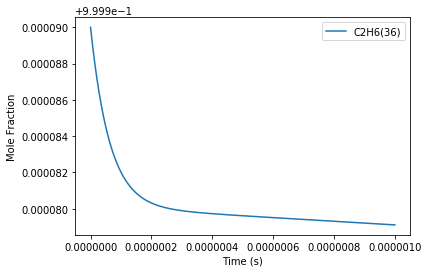

In [66]:
for species in range(gas.n_species):
    if gas_mole_fracs[species].max() > 5.e-3:
        plt.plot(rxn_time, gas_mole_fracs[species], label=gas.species_name(species))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Mole Fraction')
# plt.plot(rxn_time, gas_mole_fracs[gas.species_index('H2(6)')])
# plt.plot(rxn_time, gas_mole_fracs[gas.species_index('C2H6(36)')])

Text(0, 0.5, 'Mole Fraction')

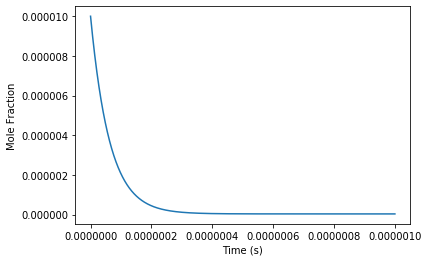

In [65]:
plt.plot(rxn_time, gas_mole_fracs[gas.species_index('H(2)')])
plt.xlabel('Time (s)')
plt.ylabel('Mole Fraction')

In [11]:
H_mole_fracs = gas_mole_fracs[gas.species_index('H(2)')]

H_half_life_amount = H_mole_fracs[0]/2.
# print(H_half_life_amount)
for x in H_mole_fracs:
    if x <= H_half_life_amount:
#         H_half_life = H_mole_fracs.index(x)
        H_half_life_time = np.where(H_mole_fracs == x)
        break

H_half_life = rxn_time[H_half_life_time[0][0]]
print(f"The half life for an H atom is {H_half_life} seconds.")

The half life for an H atom is 4.3677e-08 seconds.


In [12]:
ethane_mole_fracs = gas_mole_fracs[gas.species_index('C2H6(36)')]
ethane_change = ethane_mole_fracs[0] - ethane_mole_fracs[H_half_life_time[0][0]]
print(f"The mole fraction change of ethane after {H_half_life} seconds is {ethane_change}.")

The mole fraction change of ethane after 4.3677e-08 seconds is 5.008625403535305e-06.


The mole fraction of ethane does not change significantly in this small timescale

/Users/emilymazeau/anaconda2/envs/rmg_env/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


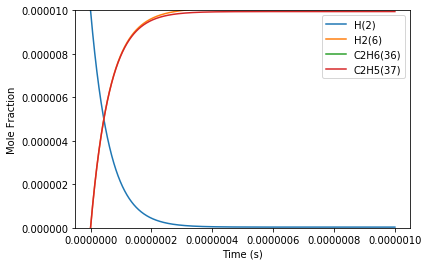

In [64]:
for species in range(gas.n_species):
    if gas_mole_fracs[species].max() > 5.e-6:
        plt.plot(rxn_time, gas_mole_fracs[species], label=gas.species_name(species))
plt.ylim(0,1e-5)
plt.ylabel('Mole Fraction')
plt.xlabel('Time (s)')
plt.legend()

H<sub>2</sub> and C<sub>2</sub>H<sub>5</sub> species are being formed.

In [59]:
for rxn in gas.reactions():
    if ('H(2)' and 'C2H6(36)') in rxn.reactants:
        if ('H2(6)' or 'C2H5(37)') in rxn.products:
            print(f"Could be {rxn.equation}, ID: {rxn.ID}")

Could be C2H6(36) + H(2) <=> C2H5(37) + H2(6), ID: 0026


Text(0.5, 1.0, 'H(2)')

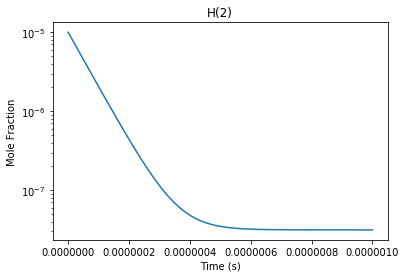

In [71]:
plt.semilogy(rxn_time, gas_mole_fracs[gas.species_index('H(2)')])
plt.ylabel('Mole Fraction')
plt.xlabel('Time (s)')
# plt.xlim(0,3e-7)
plt.title('H(2)')

H is linear at short times, as expected!

At longer times, the slope of H becomes horizontal (or close to it)

# Problem 1b